In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

In [54]:
#importing the dataset
df=pd.read_csv("Admission_Predict.csv")

In [55]:
#checking the head of the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
#checking the info and if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [57]:
# a brief summary for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [58]:
#check the correlation of the data
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


array([[<AxesSubplot:title={'center':'Serial No.'}>,
        <AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>],
       [<AxesSubplot:title={'center':'CGPA'}>,
        <AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>]], dtype=object)

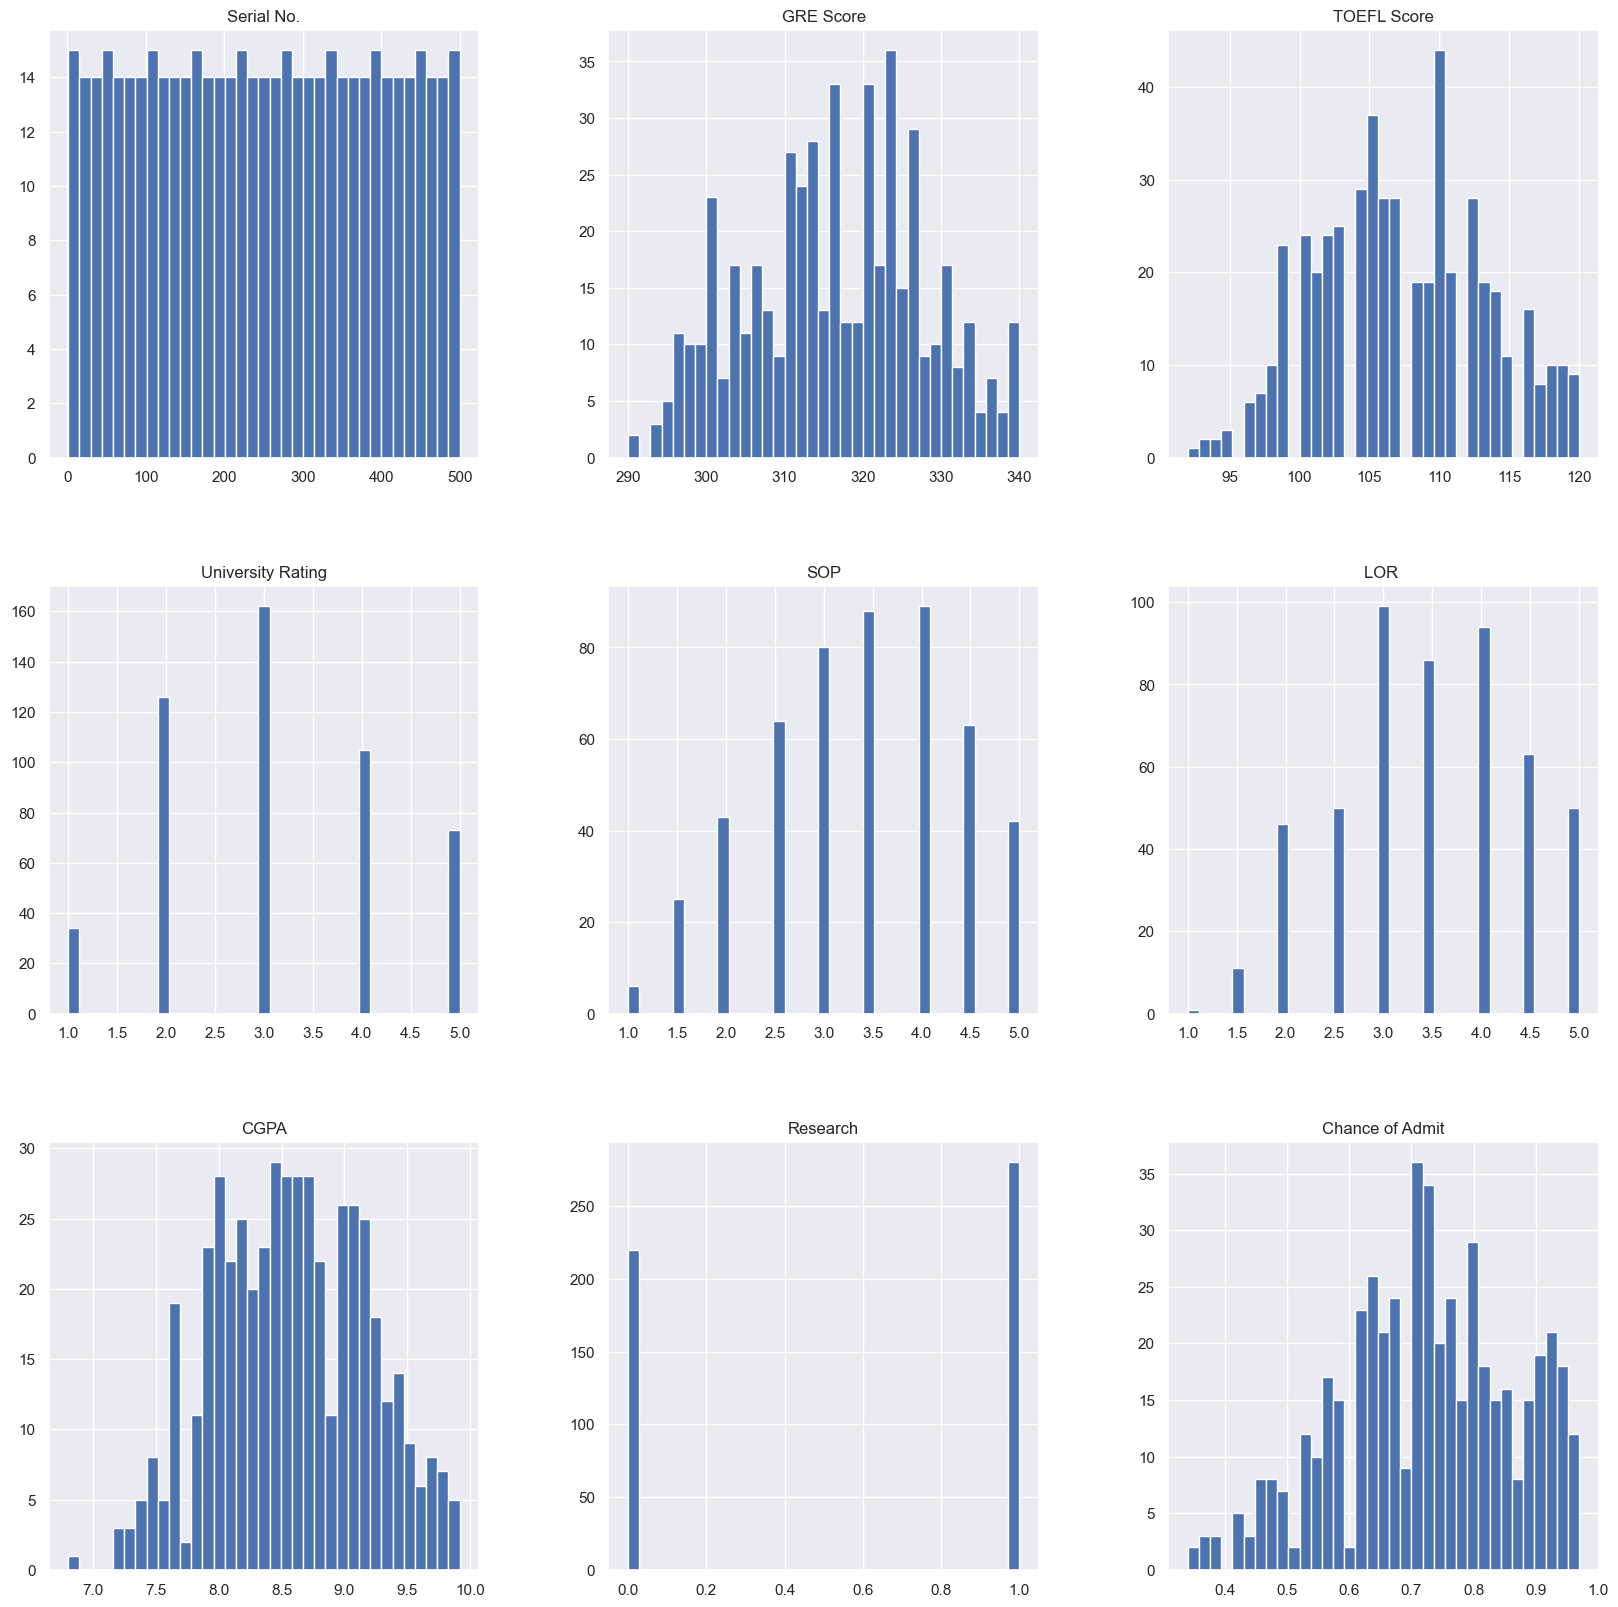

In [68]:
df.hist(bins=35,figsize=(20,20), color='b')

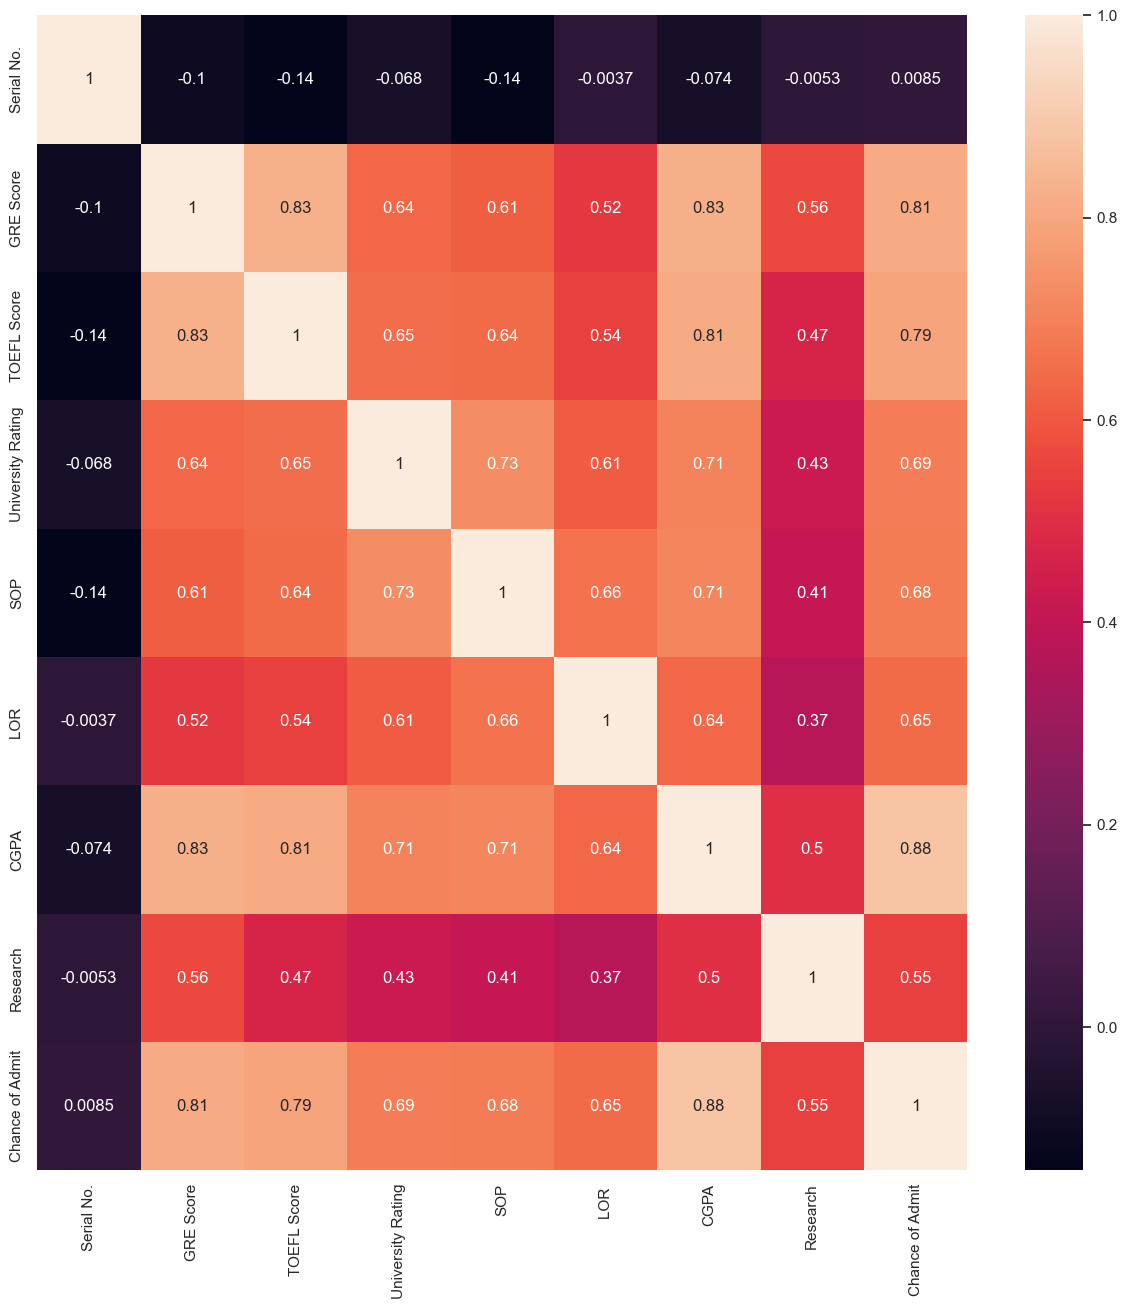

In [69]:
cor=df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor,annot=True)
plt.show()

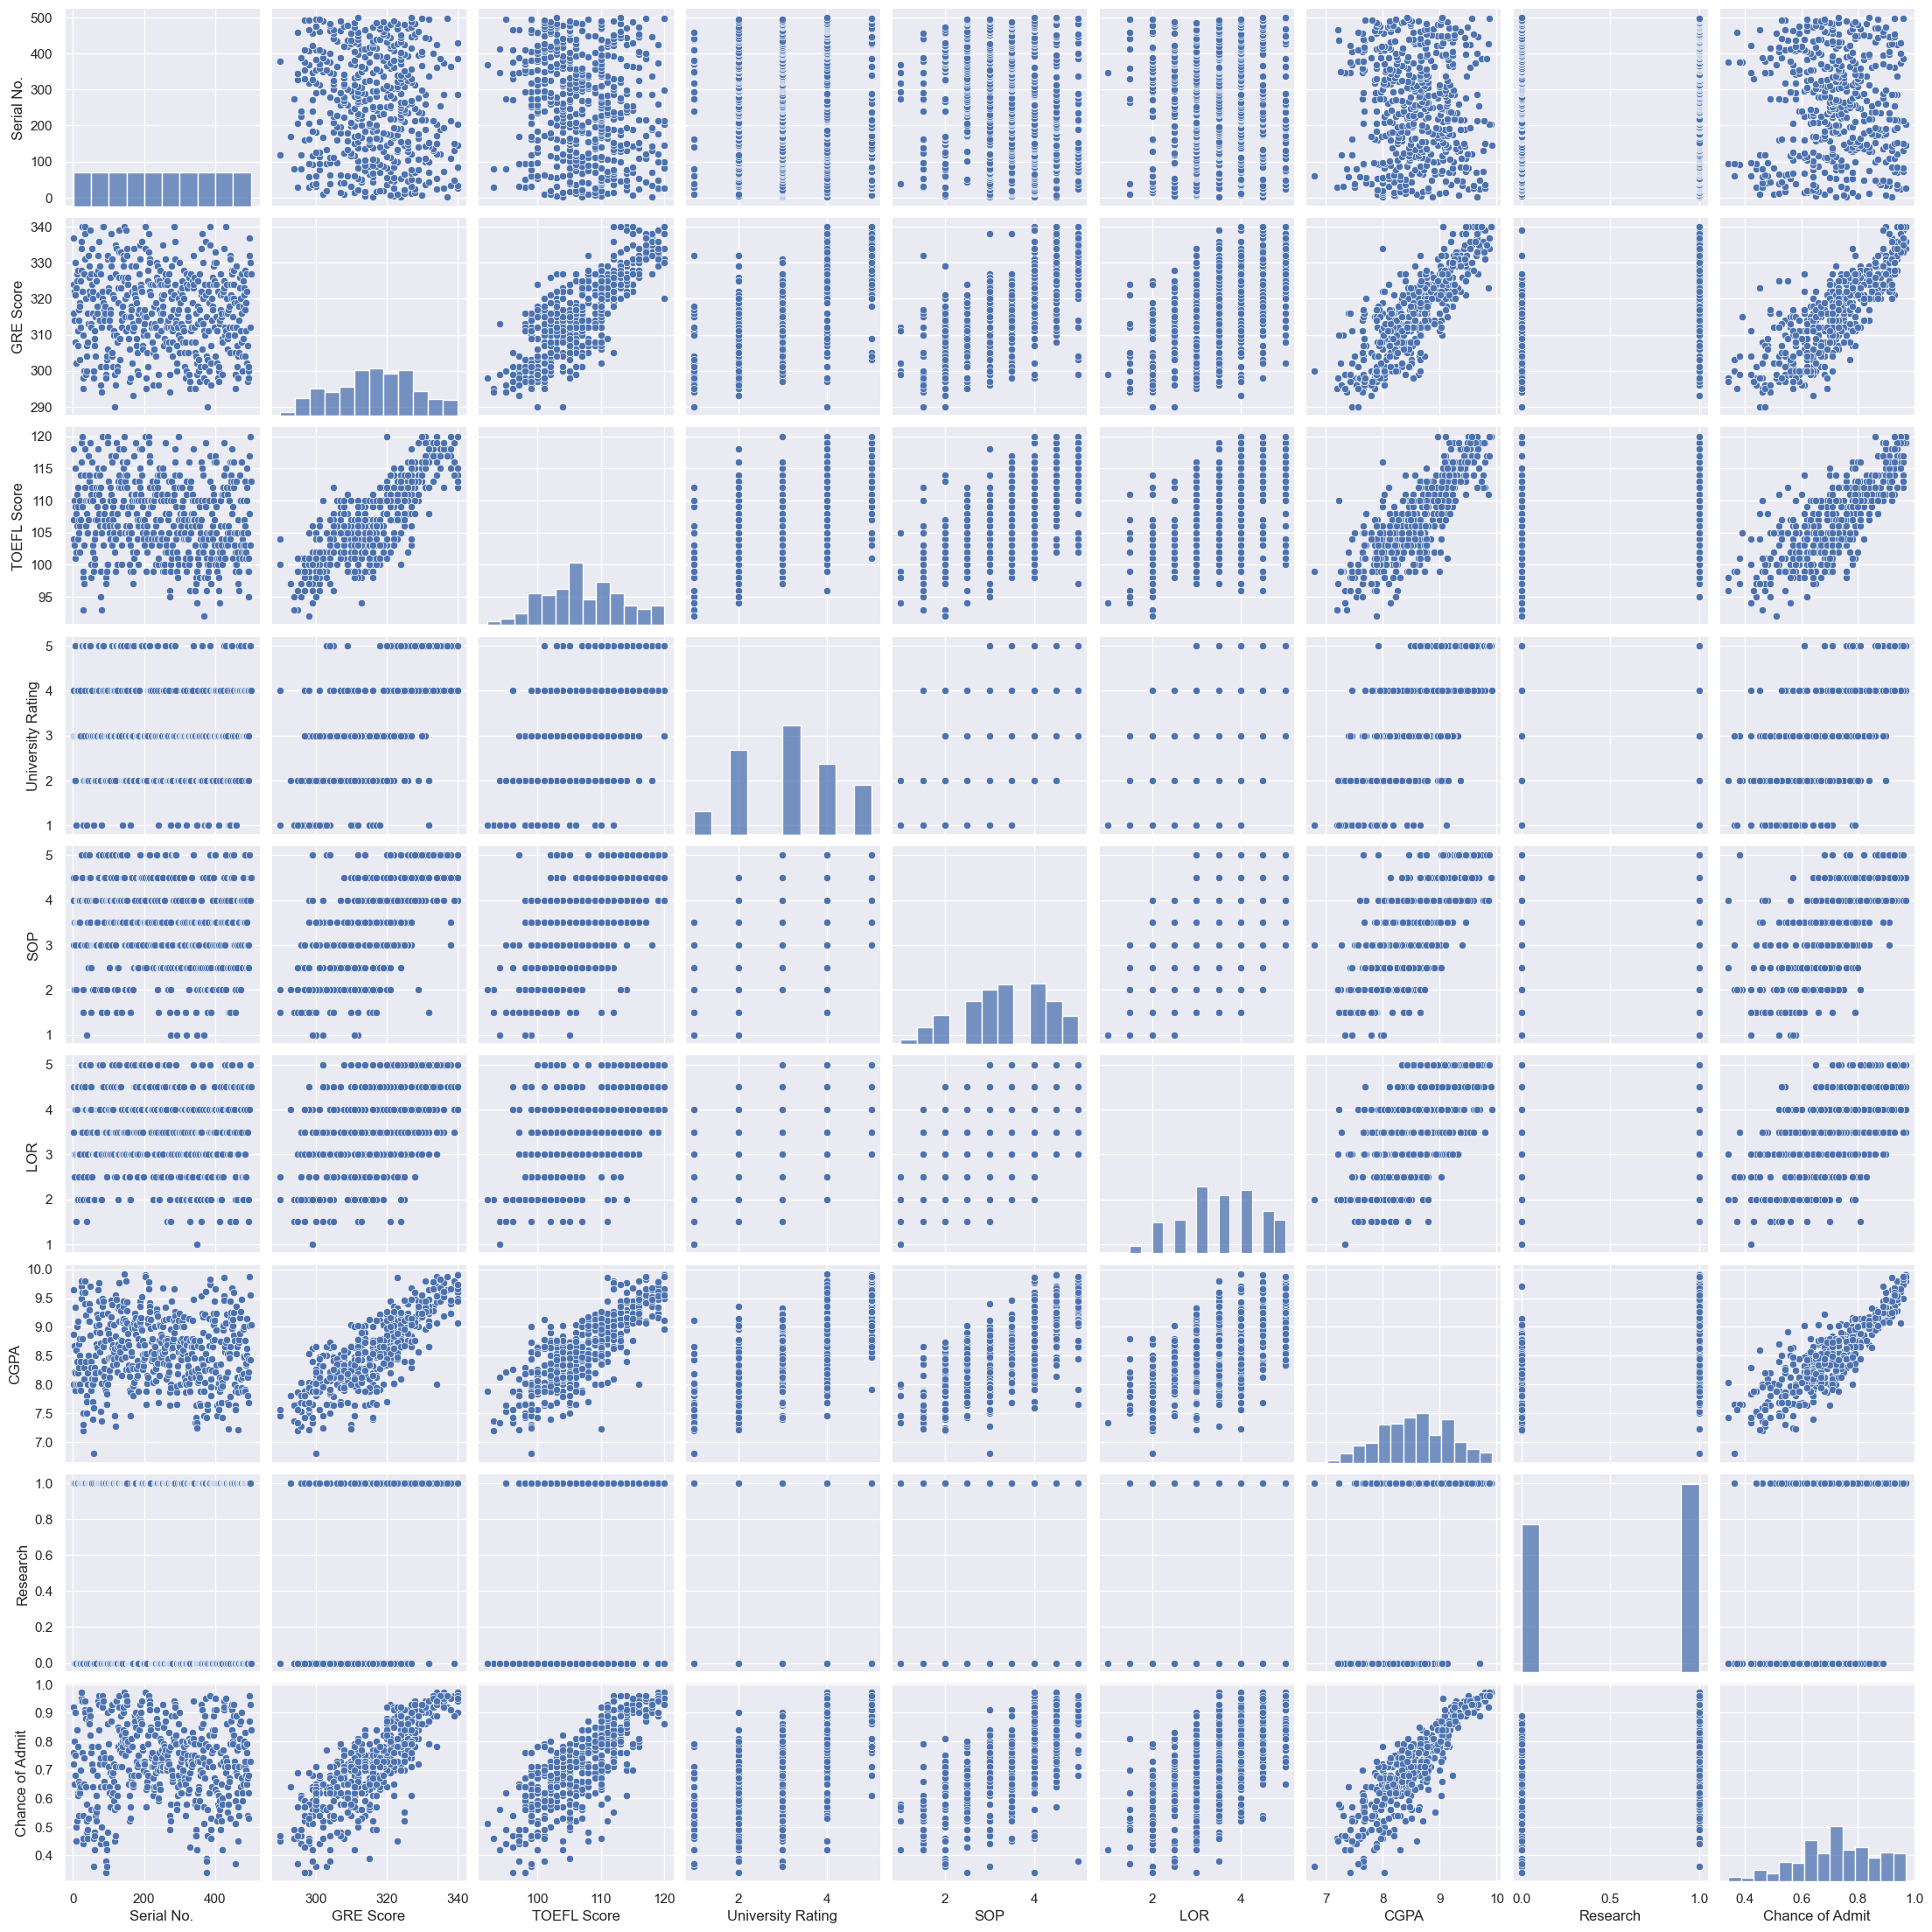

In [60]:
sns.pairplot(df)

In [61]:
#grouping the features into feature vector "independent vector"
x=df[["GRE Score","TOEFL Score","CGPA"]].values

In [62]:
#the dependent vector
y=df["Chance of Admit"].values

In [63]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [64]:
#scaling the feature vector
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [65]:
#fitting the data into linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [66]:
#predicting the outputs of x_test
y_pred=lr.predict(x_test)

In [71]:
#checking the r2score of the lr model
from sklearn.metrics import mean_squared_error , r2_score , accuracy_score
r2_score(y_test,y_pred)

0.7632878240069337

In [74]:
print(r2_score(y_pred,y_test))
print(lr.score(x_test,y_test))
print(mean_squared_error(y_pred,y_test))

0.7186673859273651
0.7632878240069337
0.004134118975674905
